# Perceptron algorithm (exercise)

In this exercise, implement a single neuron (perceptron) that classifies two groups of flowers from the Iris dataset.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, a linear discriminant model can be developed to distinguish the species from each other.

For the purpose of this exercise, you will only use two features (sepal length and sepal width) of two species of flowers (Setosa and Versicolor).

In [2]:
# allows inline plotting below each cell
%matplotlib inline

In [35]:
# import necessary libraries 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import time
from IPython import display
np.random.seed(42)

In [33]:
# Function that plots data and linear classifier

def plot_border(w1, b, data,figure):
    plt.axis([0, 10, 0, 6])
    plt.grid()
    
    # scatter data
    for i in range(len(data)) :
        point = data[i]
        color = "r"
        if point[2] == 0 :
            color = "b"
        plt.scatter(point[0], point[1], c=color)

    # separation line
    x = np.linspace(0, 10, 100)
    plt.plot(x, w1*x+b, '-g', label='y=w1*x+b')
    plt.show()  

In [11]:
### load data ###

# each point is a tuple (sepal length, sepal width, flower type)
# types: 0 for Setosa & 1 for Versicolor
train_data = [[ 5.1,  3.5,  0 ],
       [ 4.9,  3. ,  0 ],
       [ 4.7,  3.2,  0 ],
       [ 4.6,  3.1,  0 ],
       [ 5. ,  3.6,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 4.6,  3.4,  0 ],
       [ 5. ,  3.4,  0 ],
       [ 4.4,  2.9,  0 ],
       [ 4.9,  3.1,  0 ],
       [ 5.4,  3.7,  0 ],
       [ 4.8,  3.4,  0 ],
       [ 4.8,  3. ,  0 ],
       [ 4.3,  3. ,  0 ],
       [ 5.8,  4. ,  0 ],
       [ 5.7,  4.4,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 5.1,  3.5,  0 ],
       [ 5.7,  3.8,  0 ],
       [ 5.1,  3.8,  0 ],
       [ 7. ,  3.2,  1 ],
       [ 6.4,  3.2,  1 ],
       [ 6.9,  3.1,  1 ],
       [ 5.5,  2.3,  1 ],
       [ 6.5,  2.8,  1 ],
       [ 5.7,  2.8,  1 ],
       [ 6.3,  3.3,  1 ],
       [ 4.9,  2.4,  1 ],
       [ 6.6,  2.9,  1 ],
       [ 5.2,  2.7,  1 ],
       [ 5. ,  2. ,  1 ],
       [ 5.9,  3. ,  1 ],
       [ 6. ,  2.2,  1 ],
       [ 6.1,  2.9,  1 ],
       [ 5.6,  2.9,  1 ],
       [ 6.7,  3.1,  1 ],
       [ 5.6,  3. ,  1 ],
       [ 5.8,  2.7,  1 ],
       [ 6.2,  2.2,  1 ],
       [ 5.6,  2.5,  1 ],
       [ 5.9,  3.2,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.3,  2.5,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.4,  2.9,  1 ]]

testing_data = [[ 5.4,  3.4,  0. ],
           [ 4.6,  3.6,  0. ],
           [ 5.1,  3.3,  0. ],
           [ 4.8,  3.4,  0. ],
           [ 5. ,  3. ,  0. ],
           [ 5. ,  3.4,  0. ],
           [ 5.2,  3.5,  0. ],
           [ 5.2,  3.4,  0. ],
           [ 4.7,  3.2,  0. ],
           [ 4.8,  3.1,  0. ],
           [ 5.4,  3.4,  0. ],
           [ 5.2,  4.1,  0. ],
           [ 5.5,  4.2,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 5. ,  3.2,  0. ],
           [ 5.5,  3.5,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 4.4,  3. ,  0. ],
           [ 5.1,  3.4,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 4.5,  2.3,  0. ],
           [ 4.4,  3.2,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.8,  3. ,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.6,  3.2,  0. ],
           [ 5.3,  3.7,  0. ],
           [ 5. ,  3.3,  0. ],
           [ 6.8,  2.8,  1. ],
           [ 6.7,  3. ,  1. ],
           [ 6. ,  2.9,  1. ],
           [ 5.7,  2.6,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.8,  2.7,  1. ],
           [ 6. ,  2.7,  1. ],
           [ 5.4,  3. ,  1. ],
           [ 6. ,  3.4,  1. ],
           [ 6.7,  3.1,  1. ],
           [ 6.3,  2.3,  1. ],
           [ 5.6,  3. ,  1. ],
           [ 5.5,  2.5,  1. ],
           [ 5.5,  2.6,  1. ],
           [ 6.1,  3. ,  1. ],
           [ 5.8,  2.6,  1. ],
           [ 5. ,  2.3,  1. ],
           [ 5.6,  2.7,  1. ],
           [ 5.7,  3. ,  1. ],
           [ 5.7,  2.9,  1. ],
           [ 6.2,  2.9,  1. ],
           [ 5.1,  2.5,  1. ],
           [ 5.7,  2.8,  1. ]]



In [6]:
# train_data = pd.DataFrame(training_data,columns=['sepal_length','sepal_width','label'],dtype='int32')
# test_data = pd.DataFrame(testing_data,columns=['sepal_length','sepal_width','label'])
# #train_data['sepal_length'] = pd.to_numeric()
# train_data['sepal_length'] = train_data['sepal_length'].values.astype(int)
# train_data['sepal_width'] = train_data['sepal_width'].values.astype(int)

In [47]:
# write a prediction function that, when the output z is 0 prints "Iris-setosa"
# and when z = 1 prints "Iris-versicolor".
# Z is the combination of w1, w2 and the bias that make the perceptron. 

def guess_flower(SepalLength, SepalWidth) :
    z = w1*SepalLength + w2*SepalWidth + bias
    if z<0:
        print('Iris-setosa')
    else:
        print('Iris-versicolor')

## weights bsed on features
##features
##traingdata
##target
##testing
##testing features    
#     w1,w2 = np.random.rand(2)
#     bias = np.random.rand(1)[0]

#     x1 = SepalLength
#     x2 = SepalWidth
#     for row in zip(SepalLength, SepalWidth):
#         z = (w1*row[0] + w2*row[1]) + bias
#         print(z)

# guess_flower(train_data.sepal_length,train_data.sepal_width)

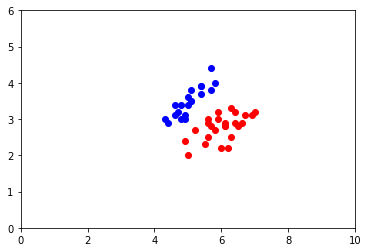

In [28]:
### visualize training data in 2D ###

# x-axis: sepal length, y-axis: sepl width
# use 2 colors to visualize 2 different classes of data 
plt.axis([0,10,0,6])
for row in train_data:
    color = 'r'
    if row[2] == 0:
        color = 'b'
    plt.scatter(row[0],row[1],c=color)

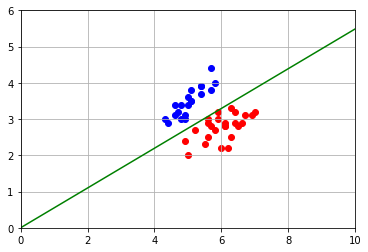

In [44]:
### training loop ###

# pick a learning rate
learning_rate = 0.1

# initialize weights randomly and set bias to zero
w1,w2 = np.random.rand(2)
bias = 0
fig = plt.figure()

# write a loop of arbitrary n iterations
for i in range(100):
    sample = np.random.randint(len(train_data))
    row = train_data[sample]
        
    # if a point is 0 and is missclassified as 1:
    #update the weights accordingly
    if row[2] == 0 and (w1*row[0] + w2*row[1] + bias) > 0:
        w1 = w1-learning_rate*row[0]
        w2 = w2-learning_rate*row[1]
        

    # if a point is 1 and is missclassified as 0:
     #update the weights accordingly 
        
    if row[2] == 1 and (w1*row[0] + w2*row[1] + bias) < 0:
        w1 = w1+learning_rate*row[0]
        w2 = w2+learning_rate*row[1]

    plot_border(-w1/w2,-bias/w2,train_data,fig)
    display.clear_output(wait = True)
    time.sleep(0.05)



# BONUS: plot the result after each iteration

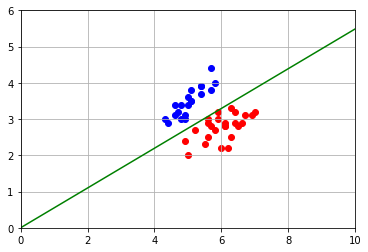

In [45]:
# plot the final result
plot_border(-w1/w2,-bias/w2,train_data,fig)

In [49]:
### evaluation ###

# perform prediction on the test dataset
for row in testing_data:
    print(row)
    guess_flower(row[0],row[1])


[5.4, 3.4, 0.0]
Iris-setosa
[4.6, 3.6, 0.0]
Iris-setosa
[5.1, 3.3, 0.0]
Iris-setosa
[4.8, 3.4, 0.0]
Iris-setosa
[5.0, 3.0, 0.0]
Iris-setosa
[5.0, 3.4, 0.0]
Iris-setosa
[5.2, 3.5, 0.0]
Iris-setosa
[5.2, 3.4, 0.0]
Iris-setosa
[4.7, 3.2, 0.0]
Iris-setosa
[4.8, 3.1, 0.0]
Iris-setosa
[5.4, 3.4, 0.0]
Iris-setosa
[5.2, 4.1, 0.0]
Iris-setosa
[5.5, 4.2, 0.0]
Iris-setosa
[4.9, 3.1, 0.0]
Iris-setosa
[5.0, 3.2, 0.0]
Iris-setosa
[5.5, 3.5, 0.0]
Iris-setosa
[4.9, 3.1, 0.0]
Iris-setosa
[4.4, 3.0, 0.0]
Iris-setosa
[5.1, 3.4, 0.0]
Iris-setosa
[5.0, 3.5, 0.0]
Iris-setosa
[4.5, 2.3, 0.0]
Iris-versicolor
[4.4, 3.2, 0.0]
Iris-setosa
[5.0, 3.5, 0.0]
Iris-setosa
[5.1, 3.8, 0.0]
Iris-setosa
[4.8, 3.0, 0.0]
Iris-setosa
[5.1, 3.8, 0.0]
Iris-setosa
[4.6, 3.2, 0.0]
Iris-setosa
[5.3, 3.7, 0.0]
Iris-setosa
[5.0, 3.3, 0.0]
Iris-setosa
[6.8, 2.8, 1.0]
Iris-versicolor
[6.7, 3.0, 1.0]
Iris-versicolor
[6.0, 2.9, 1.0]
Iris-versicolor
[5.7, 2.6, 1.0]
Iris-versicolor
[5.5, 2.4, 1.0]
Iris-versicolor
[5.5, 2.4, 1.0]
Iris-ver

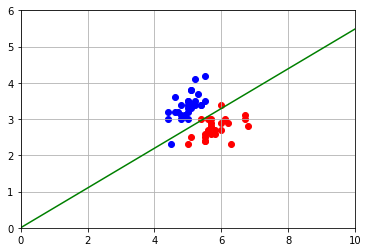

In [50]:
### plot the evaluation result ###
fig2 = plt.figure()
plot_border(-w1/w2, -bias/w2, testing_data, fig2)

### Can the accuracy be improved given the limitations (lineal function) of the perceptron algorithm?

Type your answer here:

In [ ]:
# BONUS: Create a confusion matrix with the type of classification errors

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e0bfe637-3680-4882-88ae-79f2fd8daab5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>